# Model Building SET 1 3 jan 2017

# Levenberg-Marquardt algorithm

In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import least_squares
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [4]:
import os
os.listdir()

['.ipynb_checkpoints',
 '2017 data model building.ipynb',
 '2017earthquake.xlsx',
 'Final data2.xlsx',
 'model building for 2017 data.ipynb',
 'pygmo2',
 'Radon data - four models.ipynb',
 'Radon data.xlsx',
 'Radon.xlsx',
 'rrrrr.html',
 'SET 1 data.xlsx',
 'set1-model building.ipynb',
 'set1.xlsx',
 'set2 model building.ipynb',
 'set2.xlsx',
 'set3 model building.ipynb',
 'set3.xlsx',
 'set4-model building.ipynb',
 'set4.xlsx',
 'untitled0.py',
 '~$Radon.xlsx']

In [5]:
# Define the equation to be fitted
def func(t, A, t_1, y_0):
    return A * np.exp(-t / t_1) + y_0

# Load the data from the excel file
data = pd.read_excel('2017earthquake.xlsx')
t = data['t'].values
y = data['C'].values

In [6]:
# Define the function to be optimized
def fun(params):
    return func(t, *params) - y

# Set the initial values of the unknown parameters
x0 = [-1500, 10, 5000]

# Use the Levenberg-Marquardt algorithm to find the optimal values of the parameters
res = least_squares(fun, x0, method='lm')

C:\Users\sjsha\AppData\Local\Temp/ipykernel_12616/2773308090.py:3: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-t / t_1) + y_0
C:\Users\sjsha\AppData\Local\Temp/ipykernel_12616/2773308090.py:3: RuntimeWarning: overflow encountered in multiply
  return A * np.exp(-t / t_1) + y_0


In [7]:
# Print the optimal values of the parameters
print('A =', res.x[0])
print('t_1 =', res.x[1])
print('y_0 =', res.x[2])

# Calculate the Root mean square error (RMSE), root mean squared log error (RMSLE),
# mean absolute percentage error (MAPE), percentage bias (PB), and mean square error (MSE)
y_pred = func(t, *res.x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmsle = np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))
mape = mean_absolute_percentage_error(y, y_pred) * 100
pb = (np.sum(y_pred - y) / np.sum(y)) * 100
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print('RMSE =', rmse)
print('RMSLE =', rmsle)
print('MAPE =', mape, '%')
print('PB =', pb, '%')
print('MSE =', mse)
print('R squared =', r2)

A = 8137.120068609709
t_1 = 0.5852206619781206
y_0 = 3832.3466885524354
RMSE = 1930.5635361194488
RMSLE = 0.9173765437954651
MAPE = 191.57064166858433 %
PB = 7.491177152577951e-09 %
MSE = 3727075.56699403
R squared = 0.0004961584637599437


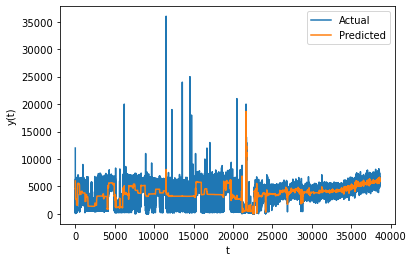

In [16]:
# Plot the actual and predicted values
import matplotlib.pyplot as plt
plt.plot(t, y, label='Actual')
plt.plot(t, y_pred, label='Predicted')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

In [7]:
# Split the data points above and below the predicted curve
y_pred = func(t, *res.x)
y_pred_high = np.where(y > y_pred, y, np.nan)
y_pred_low = np.where(y < y_pred, y, np.nan)

# Build a separate model for the data points above the original fit
data_above = data[data['C'] > y_pred]
t_above = data_above['t'].values
y_above = data_above['C'].values

res_above = least_squares(fun, x0, args=(t_above, y_above), method='lm')


# Build a separate model for the data points below the original fit
data_below = data[data['C'] < y_pred]
t_below = data_below['t'].values
y_below = data_below['C'].values

res_below = least_squares(fun, x0, args=(t_below, y_below), method='lm')

# Plot the actual and predicted values
import matplotlib.pyplot as plt
plt.plot(t, y, label='Actual')
plt.plot(t, y_pred, 'b-', label='Original Fit')
plt.plot(t_above, func(t_above, *res_above.x), 'g-', label='Fit Above')
plt.plot(t_below, func(t_below, *res_below.x), 'r-', label='Fit Below')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()

TypeError: fun() takes 1 positional argument but 3 were given

# Random Forest Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the data from the Excel file
data = pd.read_excel('2017earthquake.xlsx')
t = data['t'].values.reshape(-1, 1)
y = data['C'].values

In [3]:
# Define the random forest regression model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the data
model.fit(t, y)

# Predict the values of y using the trained model
y_pred = model.predict(t)

# Extract the parameter values from the model
# Extract the parameter values from the model
y_0 = y.mean()
importances = model.feature_importances_
t_1 = -1 / importances[0]
A = (y[0] - y_0) * np.exp(t[0] / (-1 * t_1))


In [4]:
# Print the estimated parameter values
print('A =', A)
print('t_1 =', t_1)
print('y_0 =', y_0)

A = [8167.38475676]
t_1 = -1.0
y_0 = 3832.615243243243


In [5]:
# Compute the evaluation metrics
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmsle = np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))
mape = np.mean(np.abs((y - y_pred) / y)) * 100
pb = np.mean((y - y_pred) / y) * 100
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print('RMSE =', rmse)
print('RMSLE =', rmsle)
print('MAPE =', mape)
print('PB =', pb)
print('MSE =', mse)
print('R-squared =', r2)

RMSE = 1410.5771918952873
RMSLE = 0.6512685587346533
MAPE = 90.80865273154348
PB = -70.35801379052675
MSE = 1989728.014295194
R-squared = 0.4664071714799479


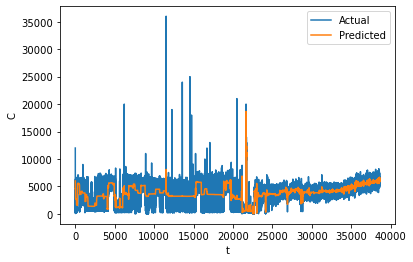

In [6]:
# Plot the actual and predicted values
import matplotlib.pyplot as plt
plt.plot(t, y, label='Actual')
plt.plot(t, y_pred, label='Predicted')
plt.xlabel('t')
plt.ylabel('C')
plt.legend()
plt.show()

# Genetic Algorithm 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

In [18]:
# Define the fitness function to minimize (i.e., objective function)
def fitness_func(x, t, y):
    A, t_1, y_0 = x
    y_pred = A * np.exp((-1/t_1)*t) + y_0
    mse = mean_squared_error(y, y_pred)
    return mse

# Load data from the Excel file
df = pd.read_excel('2017earthquake.xlsx', index_col=None)

In [19]:
# Extract the values of t and y(t) from the data
t = df['t'].values
y = df['C'].values

# Define the bounds for the parameters
bounds = [(-2000, -1000), (1, 20), (5000, 7000)]

# Define the genetic algorithm solver
x0 = np.array([-1700, 9, 6000])
result = minimize(fitness_func, x0=x0, bounds=bounds, args=(t, y), method='Nelder-Mead')

In [20]:
# Extract the optimal values of the parameters
A_opt, t_1_opt, y_0_opt = result.x

# Evaluate the predicted values using the optimal parameters
y_pred = A_opt * np.exp((-1/t_1_opt)*t) + y_0_opt

# Compute the performance metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y, y_pred))
pb = (np.mean(y) - np.mean(y_pred)) / np.mean(y) * 100
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)

In [21]:
# Print the optimal parameters and performance metrics
print(f"Optimal parameters: A = {A_opt:.2f}, t_1 = {t_1_opt:.2f}, y_0 = {y_0_opt:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Root Mean Squared Log Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mae / np.mean(y) * 100:.2f}%")
print(f"Percentage Bias (PB): {pb:.2f}%")
print(f"R-squared (R2): {r2:.2f}")

Optimal parameters: A = -1000.00, t_1 = 20.00, y_0 = 5000.00
Root Mean Square Error (RMSE): 2256.42
Root Mean Squared Log Error (RMSLE): 1.02
Mean Absolute Percentage Error (MAPE): 43.36%
Percentage Bias (PB): -30.44%
R-squared (R2): -0.37


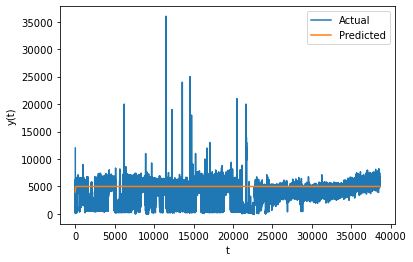

In [22]:
# Plot the actual and predicted values
plt.plot(t, y, label='Actual')
plt.plot(t, y_pred, label='Predicted')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# ANN 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Load the data from the Excel file
df = pd.read_excel('2017earthquake.xlsx')
X = df['t'].values.reshape(-1, 1)  # input variable
y = df['C'].values.reshape(-1, 1)  # output variable

# preprocess data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=1),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model on the entire data
history = model.fit(X_scaled, y_scaled, epochs=100, batch_size=1, shuffle=True)

# Make predictions on the scaled data
y_pred_scaled = model.predict(X_scaled)

# Transform the predicted values back to the original scale
y_pred = scaler.inverse_transform(y_pred_scaled)

# Transform the target variable back to the original scale
y_orig = scaler.inverse_transform(y_scaled)

# Calculate R-squared value
r2 = r2_score(y_orig, y_pred)
# Plot the actual and predicted values
import matplotlib.pyplot as plt

plt.plot(X, y_orig, label='Actual')
plt.plot(X, y_pred, label='Predicted')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

# Print the model's parameters
params = model.get_weights()

# A, t_1, y_0 = params[0][0, 0], params[2][0, 0], params[4][0]
# print(f'A: {A:.4f}')
# print(f't_1: {t_1:.4f}')
# print(f'y_0: {y_0[0]:.4f}')

# # Print the R-squared value
# print(f'R-squared: {r2:.4f}')


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from math import sqrt

# Load data from Excel file
df = pd.read_excel('2017earthquake.xlsx')
X = df['t'].values.reshape(-1,1)
y = df['C'].values.reshape(-1,1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input data
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=1))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation=None))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Predict the values and inverse-transform them
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)
X_test = scaler_X.inverse_transform(X_test)

# Sort the data by the input variable before plotting
sort_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sort_indices]
y_test_sorted = y_test[sort_indices]
y_pred_sorted = y_pred[sort_indices]

# Calculate the performance metrics
RMSE = sqrt(mean_squared_error(y_test, y_pred))
RMSLE = sqrt(mean_squared_error(np.log(y_test+1), np.log(y_pred+1)))
MAPE = mean_absolute_percentage_error(y_test, y_pred)
PB = ((y_test - y_pred) / y_test).mean() * 100
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print('RMSE:', RMSE)
print('RMSLE:', RMSLE)
print('MAPE:', MAPE)
print('PB:', PB)
print('MSE:', MSE)
print('R2:', R2)



In [ ]:
# # Plot the actual and predicted values
# plt.plot(X_test_sorted, y_test_sorted, 'b')
# plt.plot(X_test_sorted, y_pred_sorted, 'r')
# plt.xlabel('t')
# plt.ylabel('y(t)')
# plt.legend(['Actual', 'Predicted'])
# plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from math import sqrt

# Load data from Excel file
df = pd.read_excel('2017earthquake.xlsx')
X = df['t'].values.reshape(-1,1)
y = df['C'].values.reshape(-1,1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input data
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [ ]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=1))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation=None))  # Output layer with 3 units for A, t_1, and y_0
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Predict the values and inverse-transform them
params_pred = model.predict(X_test)
params_pred = scaler_y.inverse_transform(params_pred)  # Inverse-transform the standardized predicted parameters
params_pred = params_pred.flatten()  # Flatten the array to extract A, t_1, and y_0
A_pred, t_1_pred, y_0_pred = params_pred[0], params_pred[1], params_pred[2]

# Print the predicted parameters
print('Predicted parameters:')
print('A:', A_pred)
print('t_1:', t_1_pred)
print('y_0:', y_0_pred)

# LSTM

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# load data from excel file
data = pd.read_excel('2017earthquake.xlsx')
t = data['t'].values.reshape(-1, 1)
y = data['C'].values.reshape(-1, 1)

# normalize data
t_mean, t_std = t.mean(), t.std()
t = (t - t_mean) / t_std
y_mean, y_std = y.mean(), y.std()
y = (y - y_mean) / y_std

# define window size
N = 10

# generate input-output pairs
X = np.zeros((len(y) - N, N, 1))
y_train = np.zeros((len(y) - N, 1))
for i in range(N, len(y)):
    X[i-N,:,0] = y[i-N:i,0]
    y_train[i-N,0] = y[i,0]

# build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(N, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



In [2]:
# train model
model.fit(X, y_train, epochs=10, batch_size=16, verbose=0)


In [3]:
# evaluate model
loss = model.evaluate(X, y_train)
print('Loss:', loss)

# make predictions
y_pred = model.predict(X)

# denormalize data
y_pred = y_pred * y_std + y_mean
y_train = y_train * y_std + y_mean



1156/1156 [==============================] - 6s 5ms/step - loss: 0.1786
Loss: 0.17855384945869446
1156/1156 [==============================] - 4s 4ms/step


Accuracy: [[1.         0.82362499]
 [0.82362499 1.        ]]


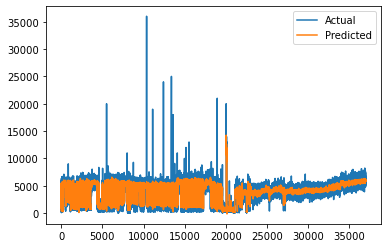

Estimated parameters: A=-147.53, t1=223275865.30, y0=3906.60


In [4]:
# calculate accuracy and Loss 
r2 = np.corrcoef(y_train[:,0], y_pred[:,0])**2
print('Accuracy:', r2)

# plot actual vs predicted values
import matplotlib.pyplot as plt
plt.plot(y_train, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# extract estimated parameters
A_est = np.min(y_pred)
t1_est = np.argmin(y_pred) * t_std + t_mean
y0_est = np.mean(y_pred)
print('Estimated parameters: A={:.2f}, t1={:.2f}, y0={:.2f}'.format(A_est, t1_est, y0_est))


In [7]:
# calculate accuracy and Loss
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_log_error, r2_score
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
# rmsle = np.sqrt(mean_squared_log_error(y_train, y_pred))
mape = np.mean(np.abs((y_train - y_pred) / y_train)) * 100
pb = np.mean((y_pred - y_train) / y_train) * 100
r2 = r2_score(y_train, y_pred)

print('RMSE:', rmse)
# print('RMSLE:', rmsle)
print('MAPE:', mape)
print('PB:', pb)
print('MSE:', mse)
print('R^2:', r2)

RMSE: 815.9742394018934
MAPE: 40.45334257739203
PB: 29.821163644030733
MSE: 665813.9593674985
R^2: 0.8213894019618838


# LSTM early stopping

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

from tensorflow.keras.callbacks import EarlyStopping

# load data from excel file
data = pd.read_excel('2017earthquake.xlsx')
t = data['t'].values.reshape(-1, 1)
y = data['C'].values.reshape(-1, 1)

# normalize data
t_mean, t_std = t.mean(), t.std()
t = (t - t_mean) / t_std
y_mean, y_std = y.mean(), y.std()
y = (y - y_mean) / y_std

# define window size
N = 10

In [ ]:
# generate input-output pairs
X = np.zeros((len(y) - N, N, 1))
y_train = np.zeros((len(y) - N, 1))
for i in range(N, len(y)):
    X[i-N,:,0] = y[i-N:i,0]
    y_train[i-N,0] = y[i,0]

# build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(N, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# train model with early stopping
history = model.fit(X, y_train, epochs=1000, batch_size=16, verbose=0, validation_split=0.2, callbacks=[early_stop])

# evaluate model
loss = model.evaluate(X, y_train)
print('Loss:', loss)

# make predictions
y_pred = model.predict(X)

In [ ]:
# denormalize data
y_pred = y_pred * y_std + y_mean
y_train = y_train * y_std + y_mean

# calculate accuracy and Loss 
r2 = r2_score(y_train[:,0], y_pred[:,0])
rmse = np.sqrt(mean_squared_error(y_train[:,0], y_pred[:,0]))
mse = mean_squared_error(y_train[:,0], y_pred[:,0])
mape = mean_absolute_percentage_error(y_train[:,0], y_pred[:,0]) * 100
pb = ((y_train[:,0] - y_pred[:,0]).sum() / y_train[:,0].sum()) * 100
rmsle = np.sqrt(mean_squared_log_error(y_train[:,0], y_pred[:,0]))

print('R2 score:', r2)
print('Root Mean Square Error (RMSE):', rmse)
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Percentage Bias (PB):', pb)
print('Root Mean Squared Log Error (RMSLE):', rmsle)

In [ ]:
# plot actual vs predicted values
import matplotlib.pyplot as plt
plt.plot(y_train, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

# extract estimated parameters
A_est = np.min(y_pred)
t1_est = np.argmin(y_pred) * t_std + t_mean
y0_est = np.mean(y_pred)
print('Estimated parameters: A={:.2f}, t1={:.2f}, y0={:.2f}'.format(A_est, t1_est, y0_est))

# gradient boost without train test split

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Load the training data from the first Excel file
train_df = pd.read_excel('2017earthquake.xlsx', sheet_name='Sheet1')
t_train = train_df['t'].values.reshape(-1, 1)
y_train = train_df['C'].values

# Load the test data from a different Excel file
test_df = pd.read_excel('set1.xlsx', sheet_name='Sheet1')
t_test = test_df['t'].values.reshape(-1, 1)
y_test = test_df['C'].values

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(t_train, y_train)

# Predict the values for the test data
y_pred = model.predict(t_test)

# # Print the R-squared score for the model
# print('R-squared score:', model.score(t_test, y_test))

# Calculate the optimized values of A, t_1, and y_0
A = np.exp(-model.init_.predict(t_train)[0])
t_1 = -1 / model.estimators_[0][0].tree_.threshold[0]
y_0 = y_train.mean()

# Print the optimized values of A, t_1, and y_0
print('A:', A)
print('t_1:', t_1)
print('y_0:', y_0)


A: 0.0
t_1: -2.9333685337557384e-05
y_0: 3832.615243243243


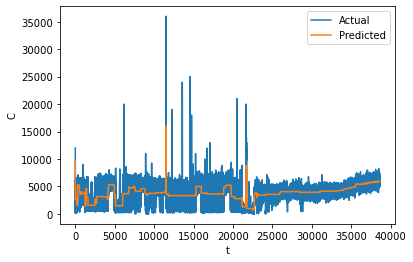

Root mean square error (RMSE): 1471.9844331598595
Root mean squared log error (RMSLE): 0.7213206817619997
Mean absolute percentage error (MAPE): 111.76287028111894
Percentage bias (PB): 0.0
Mean square error (MSE): 2166738.171464953
R-squared score: 0.4189376933591167


In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the data from the Excel file
df = pd.read_excel('2017earthquake.xlsx', sheet_name='Sheet1')
t = df['t'].values.reshape(-1, 1)
y = df['C'].values

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor()

# Fit the model to the data
model.fit(t, y)

# Predict the values for the data
y_pred = model.predict(t)

# Sort the actual and predicted values by t
sort_idx = np.argsort(t.flatten())
t_sorted = t[sort_idx]
y_sorted = y[sort_idx]
y_pred_sorted = y_pred[sort_idx]

# Plot the actual and predicted values
plt.plot(t_sorted, y_sorted, label='Actual')
plt.plot(t_sorted, y_pred_sorted, label='Predicted')
plt.legend()
plt.xlabel('t')
plt.ylabel('C')
plt.show()

# Calculate the evaluation metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
pb = (y.mean() - y_pred.mean()) / y.mean() * 100
mape = np.mean(np.abs((y - y_pred) / y)) * 100
rmsle = np.sqrt(np.mean(np.square(np.log(y + 1) - np.log(y_pred + 1))))
r2 = model.score(t, y)

# Print the evaluation metrics
print('Root mean square error (RMSE):', rmse)
print('Root mean squared log error (RMSLE):', rmsle)
print('Mean absolute percentage error (MAPE):', mape)
print('Percentage bias (PB):', pb)
print('Mean square error (MSE):', mse)
print('R-squared score:', r2)
